In [45]:
import pandas as pd
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from keras.utils import np_utils
import numpy as np

In [ ]:
#Importing required libraries.
from keras.models import Sequential
# To initialize neural network
from keras.layers import Conv2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras import Input
from keras.callbacks import ModelCheckpoint

In [ ]:
#Initializing the CNN
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:])) #In CNN. input shpae has to be given in the first layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #
model.add(Conv2D(32,(3,3))) #2nd CNN layer with 32 filter with 3,3
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # Converting to 1D matrix
model.add(Dense(128)) #128 neurons in the hidden layers
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax')) #Final layers of 2 layers same as the output to predict
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
CATEGORIES = ['Covid','Normal'] #Name of the Folders
DIRECTORY = '/Users/dkk/AINE AI - Intern/Project 9-Xray Classification/CovidData'   
#Folder containing the data
labels = [i for i in range(len(CATEGORIES))]
label_dict = dict(zip(CATEGORIES,labels)) #Creating dictionary for labels by merging two list
print(labels)
print(label_dict) # 0 for Negative and 1 for positive
print(CATEGORIES)

[0, 1]
{'Covid': 0, 'Normal': 1}
['Covid', 'Normal']


In [ ]:
import cv2 as cv
import numpy as ppool
img_size =100 #deciding a certain image size
data = []
target = []

for category in CATEGORIES: #iterating through each folders
    path = os.path.join(DIRECTORY,category) #PAth of the dataset i.e joining the path
    img_names = os.listdir(path)
    
    for img_name in img_names: # iterate through each image
        img_path = os.path.join(path,img_name)
        img = cv.imread(img_path) #reading each image files
        
        try:
            gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY) #Converting the image into gray scale
            resize = cv.resize(gray,(img_size,img_size))#resizing the image for all
            norm = ppool.zeros((800,800))
            normalize = cv.normalize(img,  norm, 0, 255, cv.NORM_MINMAX)
            data.append(resize) #appending the data/features to the empty data list
            target.append(label_dict[category]) #appending the target labels into the empty target list
            #appending the image and the label into the list
        except Exception as e:
            print("Exception: ",e)
            #Exception for image corruption or unavailable and continue

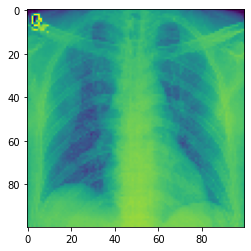

In [ ]:
plt.imshow(data[20])

In [ ]:
data = np.array(data)/255.0 #Converting to numpy array and normalize the data to 0 and 1
data.shape #1000 images of size 100X100
x = data.copy()
y = target.copy() #target containing the labels of the image i.e 0,1 for negative and normal images

In [ ]:
import pickle
pickle.dump(x,open('x.pkl','wb')) #save the processed variable to our local machine
pickle.dump(y,open('y.pkl','wb')) #wb is write binary

In [ ]:
X = pickle.load(open('x.pkl','rb')) #loading the pickle files
y = pickle.load(open('y.pkl','rb'))
y = np.array(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X.shape

(1000, 100, 100)

In [ ]:
X = X.reshape(-1,100,100,1) # for CNN model we need to reshape it to 4D array (batchsize,height,width and depth)
X.shape

(1000, 100, 100, 1)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
activation_10 (Activation)   (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_11 (Activation)   (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 16928)            

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
26/26 [==============================] - 13s 463ms/step - loss: 0.3893 - accuracy: 0.8667 - val_loss: 0.1707 - val_accuracy: 0.9556
Epoch 2/20
26/26 [==============================] - 12s 456ms/step - loss: 0.2571 - accuracy: 0.9272 - val_loss: 0.1076 - val_accuracy: 0.9556
Epoch 3/20
26/26 [==============================] - 12s 458ms/step - loss: 0.1536 - accuracy: 0.9272 - val_loss: 0.0637 - val_accuracy: 0.9556
Epoch 4/20
26/26 [==============================] - 12s 453ms/step - loss: 0.0972 - accuracy: 0.9272 - val_loss: 0.0418 - val_accuracy: 0.9556
Epoch 5/20
26/26 [==============================] - 12s 454ms/step - loss: 0.0903 - accuracy: 0.9284 - val_loss: 0.0345 - val_accuracy: 0.9556
Epoch 6/20
26/26 [==============================] - 12s 451ms/step - loss: 0.0742 - accuracy: 0.9481 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 7/20
26/26 [==============================] - 12s 449ms/step - loss: 0.0637 - accuracy: 0.9741 - val_loss: 0.0254 - val_accuracy: 1.0000

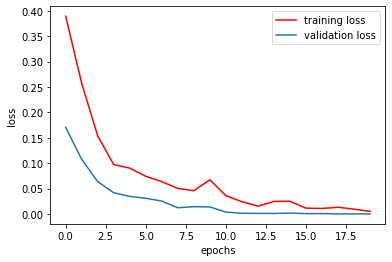

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

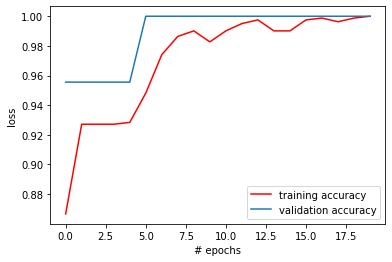

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(X_test,y_test)
print(model.evaluate(X_test,y_test)) #Evaluating the model with the help of test datas

4/4 [==============================] - 0s 65ms/step - loss: 0.0159 - accuracy: 0.9900
[0.015934020280838013, 0.9900000095367432]


In [ ]:
model.save(r'Covid_model') #Saving the model with weights to our local directory for further prediction

INFO:tensorflow:Assets written to: Covid_model/assets


In [ ]:
import cv2 as cv
import tensorflow as tf
import numpy as np

In [ ]:
def image(path):
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    new_arr = cv.resize(img,(100,100))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1,100,100,1)
    return new_arr

In [ ]:
model = tf.keras.models.load_model(r'Covid_model') #Loading the saved model to use it for prediction

In [ ]:
prediction = model.predict([image(r'/097.jpeg')])

In [ ]:
print(CATEGORIES[prediction.argmax()]) #argmax gives the largest predicted probability from the class

Covid


Populating the interactive namespace from numpy and matplotlib


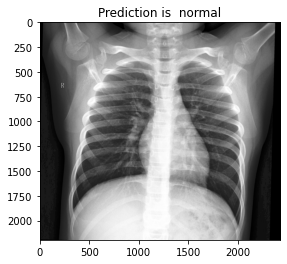

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image

img=mpimg.imread('/062.jpeg')
imgplot = plt.imshow(img)

test_image = image.load_img('/062.jpeg', target_size = (100, 100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image.reshape(-1,100,100,1)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )
#There we will test this following image, COVID-19 positive

Populating the interactive namespace from numpy and matplotlib


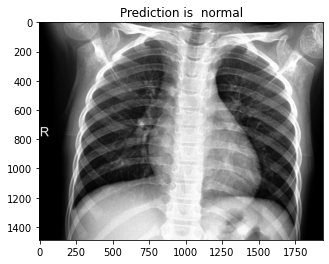

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('/097.jpeg', target_size = (100, 100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image.reshape(-1,100,100,1)
result = model.predict(test_image)

img=mpimg.imread('/097.jpeg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)
plt=plt.title('Prediction is  '+ prediction )

#There we will test this following image, COVID-19 positive

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


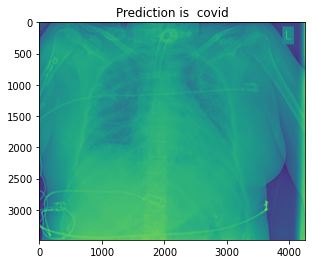

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('/0ac7580d.jpg', target_size = (100, 100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image.reshape(-1,100,100,1)
result = model.predict(test_image)

img=mpimg.imread('/0ac7580d.jpg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'covid'
else:
    prediction = 'normal'
    
#print("AI's prediction is: "+ prediction)
plt=plt.title('Prediction is  '+ prediction )

#There we will test this following image, COVID-19 positive